In [2]:
#Importar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('Downloads/Book1.csv')
datos.head()

,Date,Open,High,Low,Close,Volume
0,19/1/2021 16:00:00,87.15,90.19,86.64,89.22,2082951
1,20/1/2021 16:00:00,91.32,94.99,90.98,94.00,3207570
2,21/1/2021 16:00:00,94.68,96.60,93.97,94.21,2932973
3,22/1/2021 16:00:00,94.57,95.22,93.82,94.63,1637195
4,25/1/2021 16:00:00,95.64,96.09,92.96,94.71,2529346


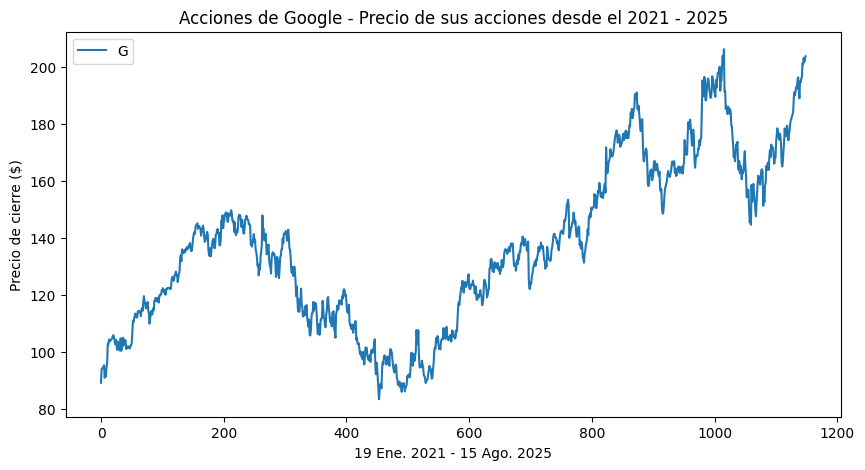

In [12]:
#Graficar datos
plt.figure(figsize = (10,5))
plt.plot(datos['Close'], label = 'Google Stock')
plt.title('Acciones de Google - Precio de sus acciones desde el 2021 - 2025')
plt.xlabel('19 Ene. 2021 - 15 Ago. 2025')
plt.ylabel('Precio de cierre ($)')
plt.legend('Google')
plt.show()

In [14]:
SMA30 = pd.DataFrame()
SMA30['Close'] = datos['Close'].rolling(window = 30).mean()
SMA30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1144,187.288000
1145,188.191667
1146,189.062333
1147,189.872333


In [18]:
SMA30[SMA30.index == 29]

,Close
29,99.968


In [19]:
SMA100 = pd.DataFrame()
SMA100['Close'] = datos['Close'].rolling(window = 100).mean()
SMA100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1144,170.5647
1145,170.9592
1146,171.3508
1147,171.7403


In [20]:
SMA100[SMA100.index == 99]

,Close
99,107.9924


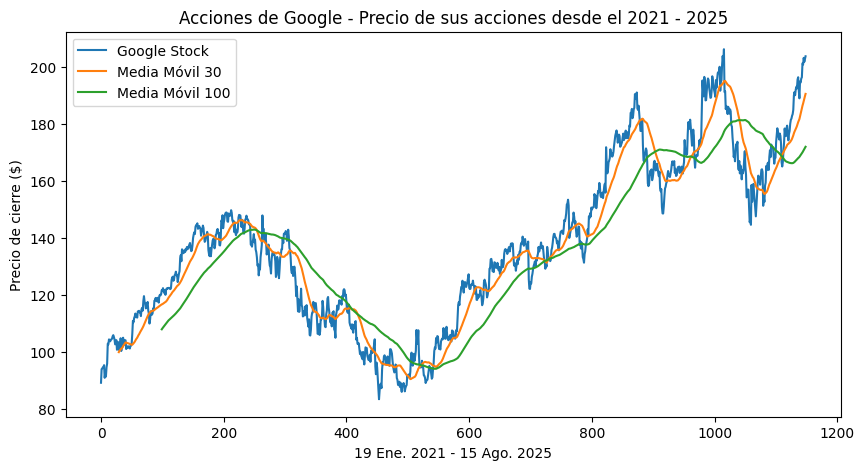

In [22]:
plt.figure(figsize = (10,5))
plt.plot(datos['Close'], label = 'Google Stock')
plt.plot(SMA30['Close'], label = 'Media Móvil 30')
plt.plot(SMA100['Close'], label = 'Media Móvil 100')
plt.title('Acciones de Google - Precio de sus acciones desde el 2021 - 2025')
plt.xlabel('19 Ene. 2021 - 15 Ago. 2025')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [23]:
data = pd.DataFrame()
data['Google'] = datos['Close']
data['SMA30'] = SMA30['Close']
data['SMA100'] = SMA100['Close']
data.head()

,Google,SMA30,SMA100
0,89.22,NaN,NaN
1,94.00,NaN,NaN
2,94.21,NaN,NaN
3,94.63,NaN,NaN
4,94.71,NaN,NaN


In [49]:
def senal(data):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data['SMA30'][dia] > data['SMA100'][dia]:
            if condicion != 1:
                compra.append(data['Google'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        
        elif data['SMA30'][dia] < data['SMA100'][dia]:
            if condicion != -1:
                venta.append(data['Google'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
    
    return (compra, venta)



In [24]:
len(data)

1149

In [25]:
data['SMA30'][29]

99.968

In [50]:
senales = senal(data)
data['Compra'] = senales[0]
data['Venta'] = senales[1]
data

,Google,SMA30,SMA100,Compra,Venta
0,89.22,NaN,NaN,NaN,NaN
1,94.00,NaN,NaN,NaN,NaN
2,94.21,NaN,NaN,NaN,NaN
3,94.63,NaN,NaN,NaN,NaN
4,94.71,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1144,201.00,187.288000,170.5647,NaN,NaN
1145,203.34,188.191667,170.9592,NaN,NaN
1146,201.96,189.062333,171.3508,NaN,NaN
1147,202.94,189.872333,171.7403,NaN,NaN


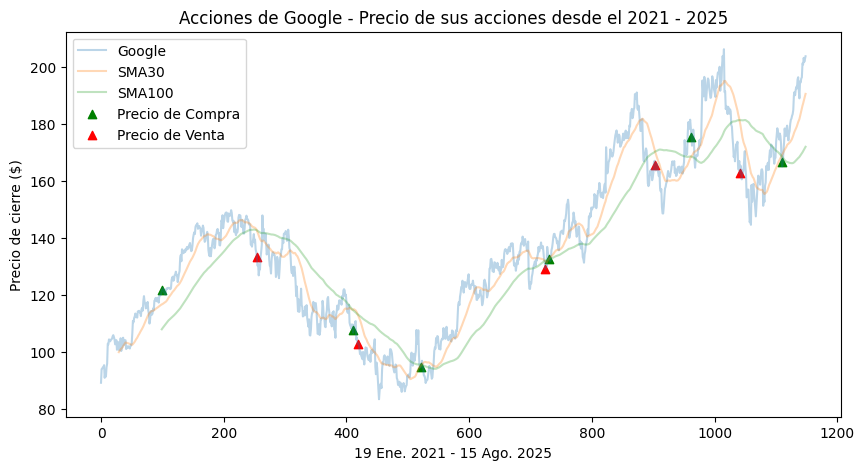

In [53]:
plt.figure(figsize = (10,5))
plt.plot(data['Google'], label = 'Google', alpha = 0.3)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.3)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.3)
plt.scatter(data.index, data['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data.index, data['Venta'], label = 'Precio de Venta', marker = '^', color = 'red')
plt.title('Acciones de Google - Precio de sus acciones desde el 2021 - 2025')
plt.xlabel('19 Ene. 2021 - 15 Ago. 2025')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()